[![preview notebook](https://img.shields.io/static/v1?label=render%20on&logo=github&color=87ce3e&message=GitHub)](https://github.com/open-atmos/PySDM/blob/main/examples/PySDM_examples/seeding/seeding_no_collisions.ipynb)
[![launch on mybinder.org](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/open-atmos/PySDM.git/main?urlpath=lab/tree/examples/PySDM_examples/seeding/seeding_no_collisions.ipynb)
[![launch on Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/open-atmos/PySDM/blob/main/examples/PySDM_examples/seeding/seeding_no_collisions.ipynb)

TODO #1417

In [1]:
import sys
if 'google.colab' in sys.modules:
    !pip --quiet install open-atmos-jupyter-utils
    from open_atmos_jupyter_utils import pip_install_on_colab
    pip_install_on_colab('PySDM-examples')

In [2]:
import numpy as np
from matplotlib import pyplot
from PySDM import Formulae
from PySDM.physics import in_unit, si
from open_atmos_jupyter_utils import show_plot
from PySDM_examples.seeding import Settings, Simulation

In [3]:
n_sd_initial = 100
n_sd_seeding = 100
formulae = Formulae(seed=100)

simulations = {
    case: Simulation(
        Settings(
            n_sd_initial=n_sd_initial,
            n_sd_seeding=n_sd_seeding,
            rain_water_radius_threshold=0 * si.mm,
            super_droplet_injection_rate={
                'seeding': lambda time: 1 if 15 * si.min < time < 20 * si.min else 0,
                'no seeding': lambda _: 0,
            }[case],
            formulae=formulae,
            enable_collisions=False,
        )
    )
    for case in ('seeding', 'no seeding')
}    

In [4]:
outputs = {case: simulations[case].run() for case in simulations}

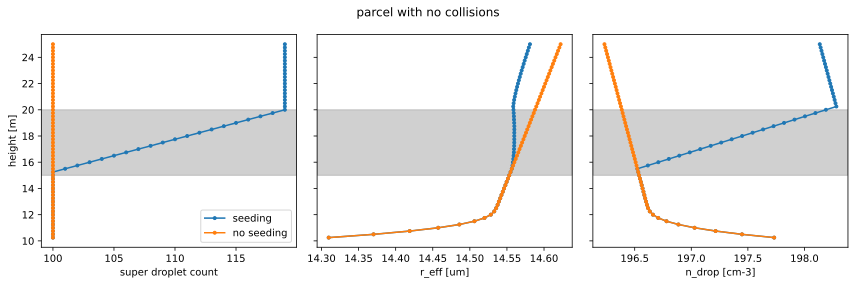

In [5]:
fig, axs = pyplot.subplot_mosaic(
        [['a', 'b', 'c']],
        sharey=True,
        figsize=(12, 4),
        tight_layout=True
    )

for case, output in outputs.items():
    time = output['products']['time']
    idx = np.where(time > 10 * si.min)[0]

    axs['a'].plot(
        output['products']['sd_count'][idx],
        in_unit(time[idx], si.min),
        marker='.',
        label=case,
    )
    axs['a'].set_xlabel("super droplet count")
    axs['a'].set_ylabel("height [m]")
    axs['a'].axhspan(15, 20, color="grey", alpha=0.2)

    axs['b'].plot(
        output['products']['r_eff'][idx],
        in_unit(time[idx], si.min),
        marker='.',
    )
    axs['b'].set_xlabel("r_eff [um]")
    axs['b'].axhspan(15, 20, color="grey", alpha=0.2)

    axs['c'].plot(
        output['products']['n_drop'][idx],
        in_unit(time[idx], si.min),
        marker='.',
    )
    axs['c'].set_xlabel("n_drop [cm-3]")
    axs['c'].axhspan(15, 20, color="grey", alpha=0.2)

axs['a'].legend()
fig.suptitle("parcel with no collisions")
show_plot("seeding_no_collisions.pdf")